## Imports

In [91]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score
import plotly.express as px
from sklearn.tree import DecisionTreeClassifier

## Read Data

In [93]:
df = pd.read_csv('health_care.csv')

## initial Exploring Data

In [95]:
df.head()

,patient_name,age,blood_pressure,cholesterol,diabetes,heart_rate,temperature,gender,bmi,smoker,...,kidney_function,mental_health_score,infection_risk,diagnosis,treatment_outcome,treatment_start,treatment_end,adherence_level,hospital_stay_days,medication
0,Fatma Hassan,54,140.0,166.0,0,74,36.7,Female,31.2,0,...,75,1,Low,Liver Disease,failure,5/22/2023,7/2/2023,Medium,8,NaN
1,Hana Mostafa,84,116.0,234.0,0,88,38.0,Female,31.5,0,...,69,10,High,Healthy,improvement,5/22/2023,7/2/2023,Medium,2,No Drug
2,Fatma Hassan,74,147.0,265.0,0,76,37.7,Female,32.1,0,...,89,6,Medium,Kidney Disease,failure,9/20/2023,12/20/2024,Medium,22,Lisinopril
3,Yassin Mahmoud,80,125.0,262.0,0,90,36.2,Female,31.9,1,...,85,1,Low,Heart Disease,failure,3/24/2024,4/2/2024,Low,28,Lisinopril
4,Laila Hassan,74,133.0,153.0,0,84,37.3,Male,37.5,0,...,72,3,Low,Liver Disease,failure,12/6/2024,3/13/2025,Medium,29,Statins


In [96]:
df.describe()

,age,blood_pressure,cholesterol,diabetes,heart_rate,temperature,bmi,smoker,exercise_per_week,hospital_visits,blood_sugar,liver_function,kidney_function,mental_health_score,hospital_stay_days
count,5000.000000,4750.000000,4650.000000,5000.000000,5000.000000,5000.00000,4700.000000,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,54.828200,129.740421,209.394194,0.206400,79.403400,37.26418,28.012128,0.302600,3.12980,4.623800,129.848020,49.247760,74.153800,5.088400,12.234000
std,20.376264,15.078059,29.164240,0.404761,9.660255,0.72445,5.107462,0.459429,2.13529,3.266926,31.730374,21.675851,19.630232,2.425647,9.350355
min,20.000000,90.000000,150.000000,0.000000,60.000000,36.00000,18.500000,0.000000,0.00000,0.000000,80.000000,10.000000,30.000000,1.000000,0.000000
25%,37.000000,119.000000,188.000000,0.000000,73.000000,36.60000,24.300000,0.000000,1.00000,2.000000,104.450000,32.000000,60.000000,3.000000,4.000000
50%,54.000000,130.000000,209.000000,0.000000,79.000000,37.30000,27.900000,0.000000,3.00000,4.000000,124.700000,49.250000,74.000000,5.000000,10.000000
75%,73.000000,140.000000,230.000000,0.000000,86.000000,37.90000,31.500000,1.000000,5.00000,8.000000,152.325000,66.900000,88.000000,7.000000,20.000000
max,90.000000,180.000000,300.000000,1.000000,117.000000,38.50000,40.000000,1.000000,7.00000,10.000000,199.800000,100.000000,120.000000,10.000000,30.000000


In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   patient_name         5000 non-null   object 
 1   age                  5000 non-null   int64  
 2   blood_pressure       4750 non-null   float64
 3   cholesterol          4650 non-null   float64
 4   diabetes             5000 non-null   int64  
 5   heart_rate           5000 non-null   int64  
 6   temperature          5000 non-null   float64
 7   gender               5000 non-null   object 
 8   bmi                  4700 non-null   float64
 9   smoker               5000 non-null   int64  
 10  exercise_per_week    5000 non-null   int64  
 11  alcohol_intake       2521 non-null   object 
 12  hospital_visits      5000 non-null   int64  
 13  blood_sugar          5000 non-null   float64
 14  liver_function       5000 non-null   float64
 15  kidney_function      5000 non-null   i

In [98]:
df.columns

Index(['patient_name', 'age', 'blood_pressure', 'cholesterol', 'diabetes',
       'heart_rate', 'temperature', 'gender', 'bmi', 'smoker',
       'exercise_per_week', 'alcohol_intake', 'hospital_visits', 'blood_sugar',
       'liver_function', 'kidney_function', 'mental_health_score',
       'infection_risk', 'diagnosis', 'treatment_outcome', 'treatment_start',
       'treatment_end', 'adherence_level', 'hospital_stay_days', 'medication'],
      dtype='object')

In [99]:
string_cols = df.select_dtypes(include=['object', 'string']).columns
cols = string_cols.difference(['patient_name', 'treatment_start', 'treatment_end'])

for col in cols:
    print(f"\nUnique values in '{col}':")
    print(df[col].unique())


Unique values in 'adherence_level':
['Medium' 'Low' 'High']

Unique values in 'alcohol_intake':
[nan 'Low' 'High' 'Moderate']

Unique values in 'diagnosis':
['Liver Disease' 'Healthy' 'Kidney Disease' 'Heart Disease' 'Diabetes'
 'Hypertension']

Unique values in 'gender':
['Female' 'Male']

Unique values in 'infection_risk':
['Low' 'High' 'Medium']

Unique values in 'medication':
[nan 'No Drug' 'Lisinopril' 'Statins' 'Metformin' 'Beta Blockers']

Unique values in 'treatment_outcome':
['failure' 'improvement' 'recovered']


In [100]:
df.duplicated().sum()

0

In [101]:
df.isnull().sum()

patient_name              0
age                       0
blood_pressure          250
cholesterol             350
diabetes                  0
heart_rate                0
temperature               0
gender                    0
bmi                     300
smoker                    0
exercise_per_week         0
alcohol_intake         2479
hospital_visits           0
blood_sugar               0
liver_function            0
kidney_function           0
mental_health_score       0
infection_risk            0
diagnosis                 0
treatment_outcome         0
treatment_start         150
treatment_end             0
adherence_level           0
hospital_stay_days        0
medication              401
dtype: int64

## Data Handling

In [103]:
# to calc. duration of treatment
df["treatment_start"] = pd.to_datetime(df["treatment_start"], errors="coerce")
df["treatment_end"] = pd.to_datetime(df["treatment_end"], errors="coerce")

# drop rows have null values in treatment_start col
df = df.dropna(subset=['treatment_start'])

df['treatment_duration'] = (df['treatment_end'] - df['treatment_start']).dt.days

# delete treatment_end , treatment_start columns , patient_name
df = df.drop(columns=['treatment_start', 'treatment_end' , 'patient_name'])

In [104]:
print(len(df.groupby(['age', 'bmi', 'gender'])))
print(len(df.groupby(["gender", "age", "bmi"])))
print(len(df.groupby(["gender", "age", "exercise_per_week"])))

4254
4254
1101


In [105]:

df['age_bin'] = pd.cut(df['age'], bins=[0, 30, 45, 60, 80, 100], 
                       labels=['young', 'mid1', 'mid2', 'old', 'very_old'])

df["bmi"] = df.groupby(["gender", "age_bin", "exercise_per_week"], observed=False)["bmi"]\
              .transform(lambda x: x.fillna(x.median()))

df['bmi_bin'] = pd.cut(df['bmi'], bins=[0, 18.5, 25, 30, 35, 100], 
                       labels=['underweight', 'normal', 'overweight', 'obese', 'very_obese'])

df['blood_pressure'] = df.groupby(['age_bin', 'bmi_bin', 'gender'], observed=False)['blood_pressure']\
                          .transform(lambda x: x.fillna(x.mean()))

df["cholesterol"] = df.groupby(["gender", "age_bin", "bmi_bin"], observed=False)["cholesterol"]\
                      .transform(lambda x: x.fillna(x.median()))

df["alcohol_intake"] = df["alcohol_intake"].fillna(df["alcohol_intake"].mode()[0])

In [106]:
for val in df['diagnosis'].unique():
    print(f"{val} :\n {df[df['diagnosis'] == val]['medication'].value_counts()}")

Liver Disease :
 medication
Statins          501
No Drug           23
Lisinopril        18
Metformin         12
Beta Blockers      1
Name: count, dtype: int64
Healthy :
 medication
No Drug          1448
Lisinopril         52
Metformin          32
Statins            21
Beta Blockers       2
Name: count, dtype: int64
Kidney Disease :
 medication
Lisinopril       665
No Drug           24
Statins           10
Metformin          3
Beta Blockers      2
Name: count, dtype: int64
Heart Disease :
 medication
Beta Blockers    63
Lisinopril        3
No Drug           3
Metformin         2
Statins           1
Name: count, dtype: int64
Diabetes :
 medication
Metformin     857
Lisinopril     29
No Drug        27
Statins        10
Name: count, dtype: int64
Hypertension :
 medication
Lisinopril    605
No Drug        19
Metformin      12
Statins        12
Name: count, dtype: int64


In [107]:
df['medication'].unique()

array([nan, 'No Drug', 'Lisinopril', 'Statins', 'Metformin',
       'Beta Blockers'], dtype=object)

In [108]:
df.loc[df['medication'] == 'unknown', 'medication'] = np.nan

In [109]:
# fillna in medication column
df['medication'] = df['medication'].fillna(df.groupby('diagnosis')['medication'].transform(lambda x:x.mode()[0]))

In [110]:
df.isnull().sum()

age                    0
blood_pressure         0
cholesterol            0
diabetes               0
heart_rate             0
temperature            0
gender                 0
bmi                    0
smoker                 0
exercise_per_week      0
alcohol_intake         0
hospital_visits        0
blood_sugar            0
liver_function         0
kidney_function        0
mental_health_score    0
infection_risk         0
diagnosis              0
treatment_outcome      0
adherence_level        0
hospital_stay_days     0
medication             0
treatment_duration     0
age_bin                0
bmi_bin                0
dtype: int64

## Boxplots for outliers

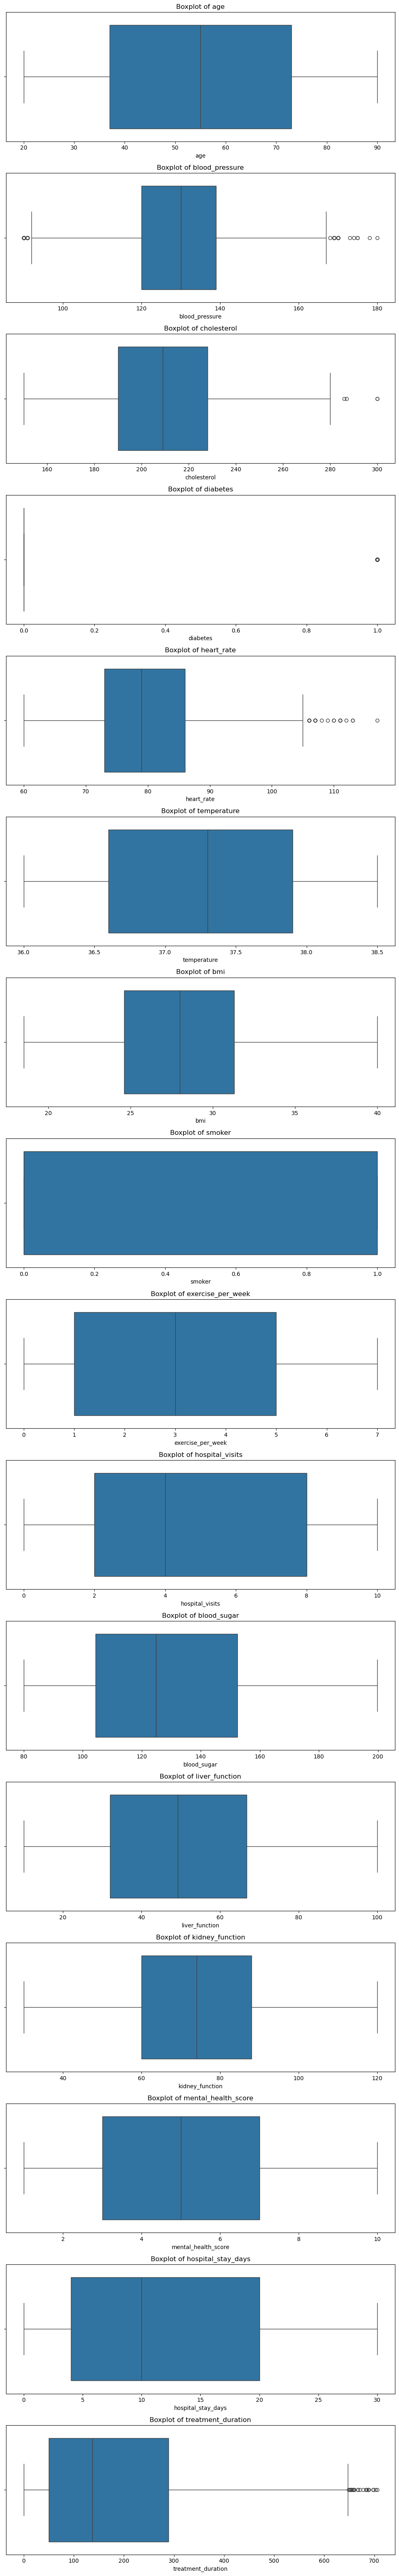

In [112]:
numeric_cols = df.select_dtypes(include=["int64", "float64"]).columns
plt.figure(figsize=(10, len(numeric_cols)*4))

for i, col in enumerate(numeric_cols):
    plt.subplot(len(numeric_cols), 1, i+1)
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")

plt.tight_layout()
plt.show()

## Visualize distributions

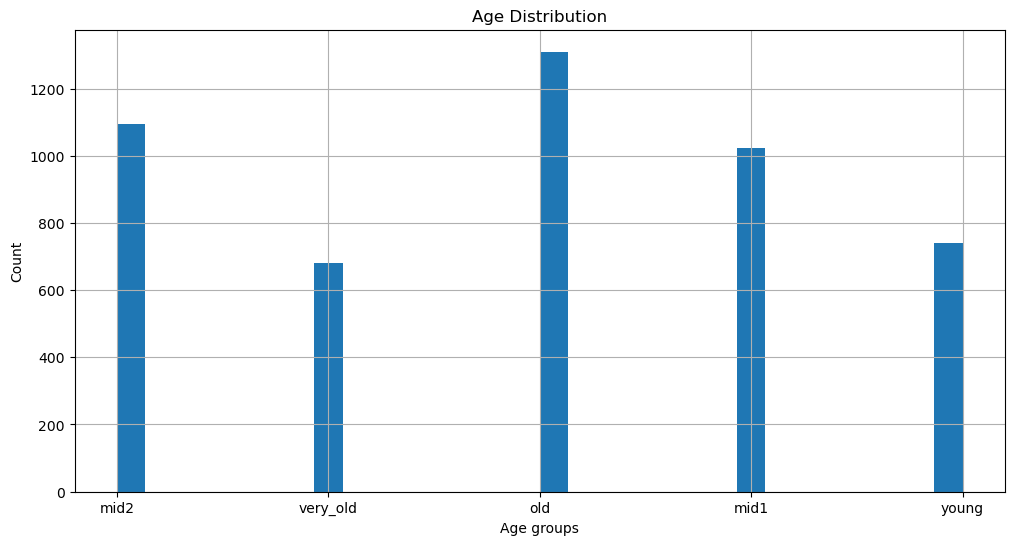

In [114]:
plt.figure(figsize=(12, 6))
df['age_bin'].hist(bins=30)
plt.title('Age Distribution')
plt.xlabel('Age groups')
plt.ylabel('Count')
plt.show()

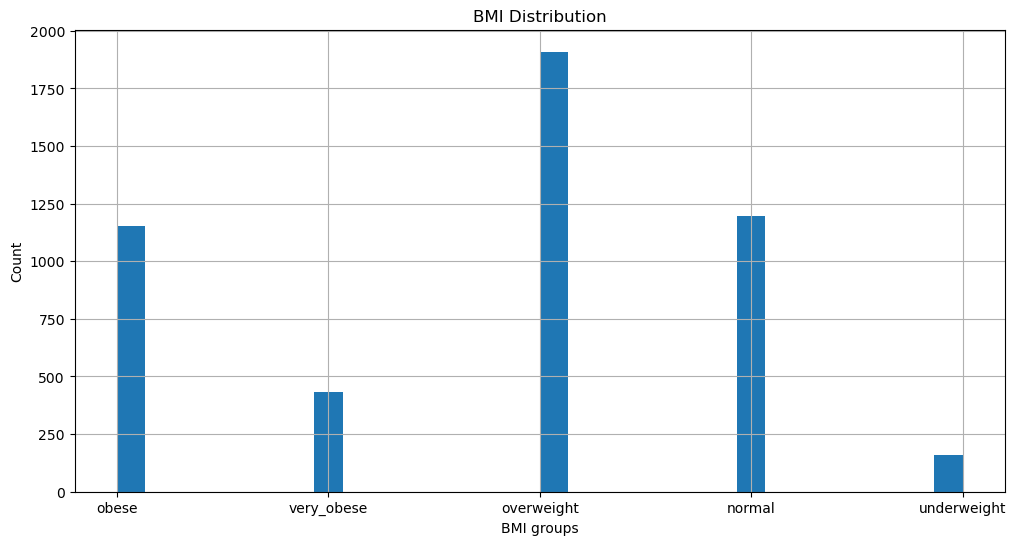

In [115]:
plt.figure(figsize=(12, 6))
df['bmi_bin'].hist(bins=30)
plt.title('BMI Distribution')
plt.xlabel('BMI groups')
plt.ylabel('Count')
plt.show()

In [116]:
# delete binnig
#df = df.drop(columns=['age_bin', 'bmi_bin'])

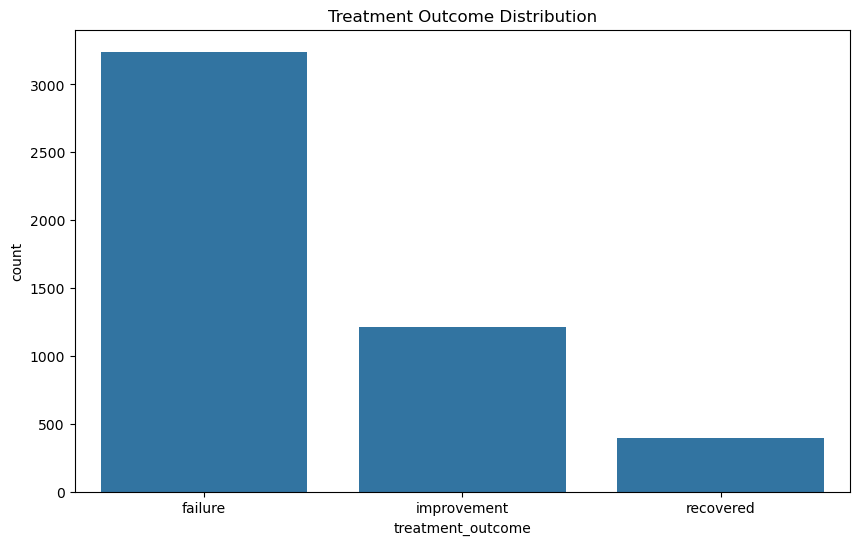

In [117]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='treatment_outcome')
plt.title("Treatment Outcome Distribution")
plt.show()

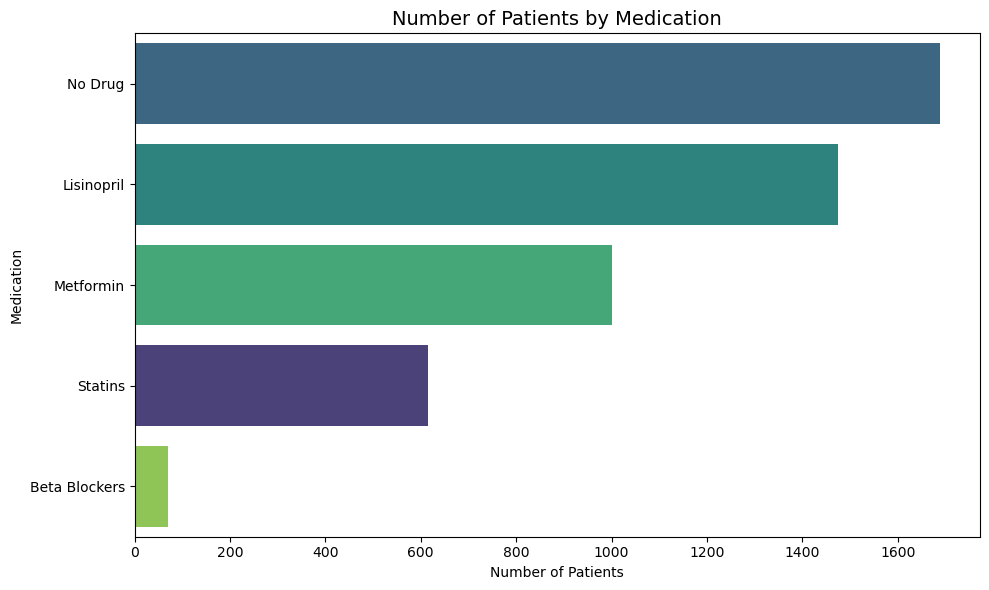

In [118]:
plt.figure(figsize=(10, 6))
sns.countplot(
    y='medication',
    hue='medication',
    data=df,
    order=df['medication'].value_counts().index,
    palette='viridis',
    legend=False
)
plt.title('Number of Patients by Medication', fontsize=14)
plt.xlabel('Number of Patients')
plt.ylabel('Medication')
plt.tight_layout()
plt.show()


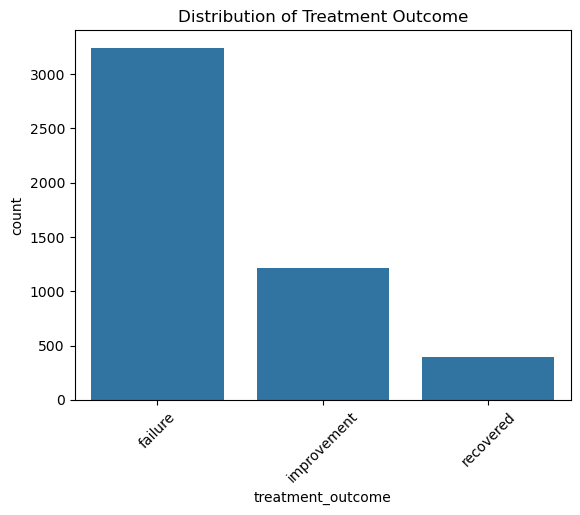

In [119]:
#حالة الناس الخارجة من المستشفي
sns.countplot(x='treatment_outcome', data=df)
plt.xticks(rotation=45)
plt.title("Distribution of Treatment Outcome")
plt.show()


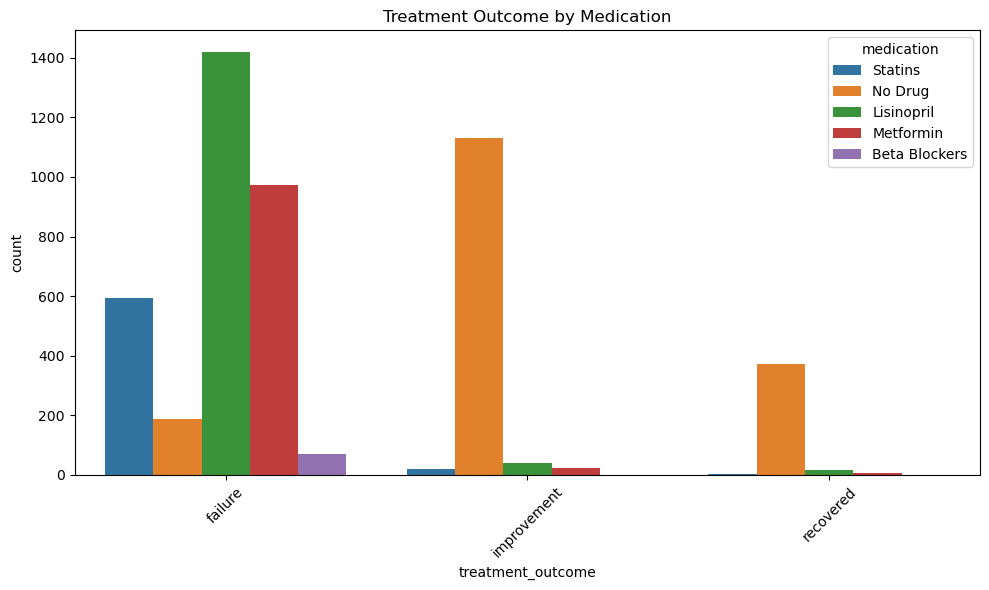

In [120]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='treatment_outcome', hue='medication')
plt.title("Treatment Outcome by Medication")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## Heatmap for correlations

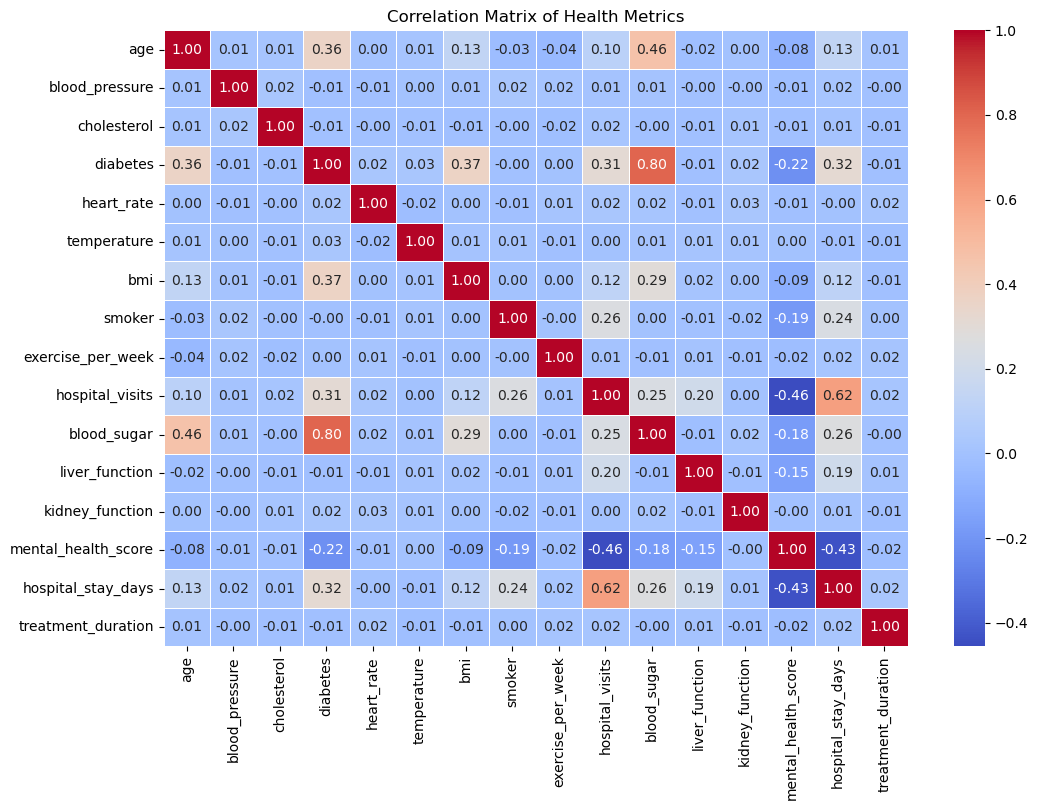

In [122]:
plt.figure(figsize=(12, 8))
sns.heatmap(
    df.select_dtypes(include='number').corr(),
    annot=True,
    cmap='coolwarm',
    fmt=".2f",
    linewidths=0.5
)
plt.title("Correlation Matrix of Health Metrics")
plt.show()
#من الصورة تحت 
#في ترابط بين عمود blood_sugar& diabetes بمعامل 0.8
#hospital_visits & hospital_stay_days معامل 0.62
# age & blood_sugar  0.46
# haspital_visits & mental_health_score -0.46
#mental_health_score & hospital_stay_days -0.43

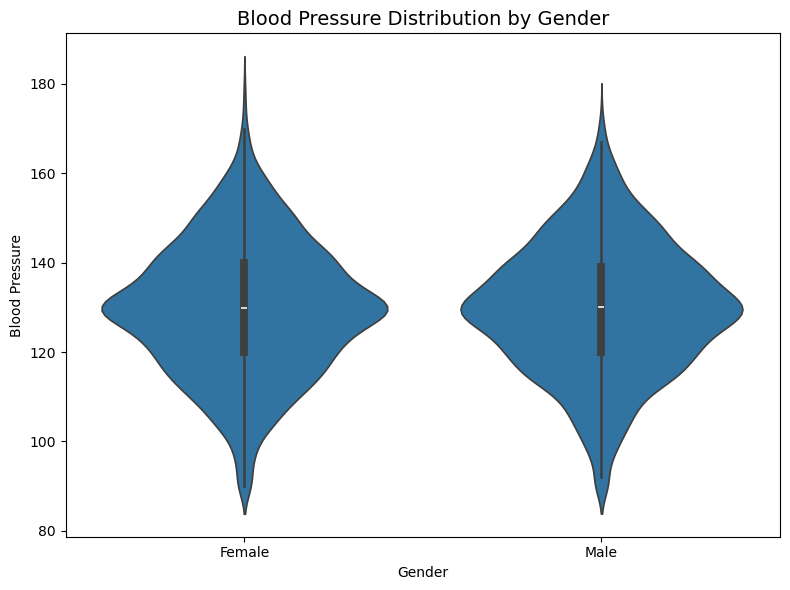

In [123]:

plt.figure(figsize=(8, 6))
sns.violinplot(x='gender', y='blood_pressure', data=df)
plt.title("Blood Pressure Distribution by Gender", fontsize=14)
plt.xlabel("Gender")
plt.ylabel("Blood Pressure")
plt.tight_layout()
plt.show()


In [124]:
fig = px.scatter(df, y="age_bin", x="bmi", color="treatment_outcome",
                 hover_data=["diagnosis"], title="Age vs BMI vs Treatment Outcome")
fig.show()

In [125]:
fig = px.line(df.sort_values("age"), x="age", y="hospital_visits", markers=True,
              title="Hospital Visits by Age")
fig.show()

In [126]:
fig = px.box(df, x="diagnosis", y="mental_health_score", color="diagnosis",
             title="Mental Health Score by Diagnosis")
fig.show()

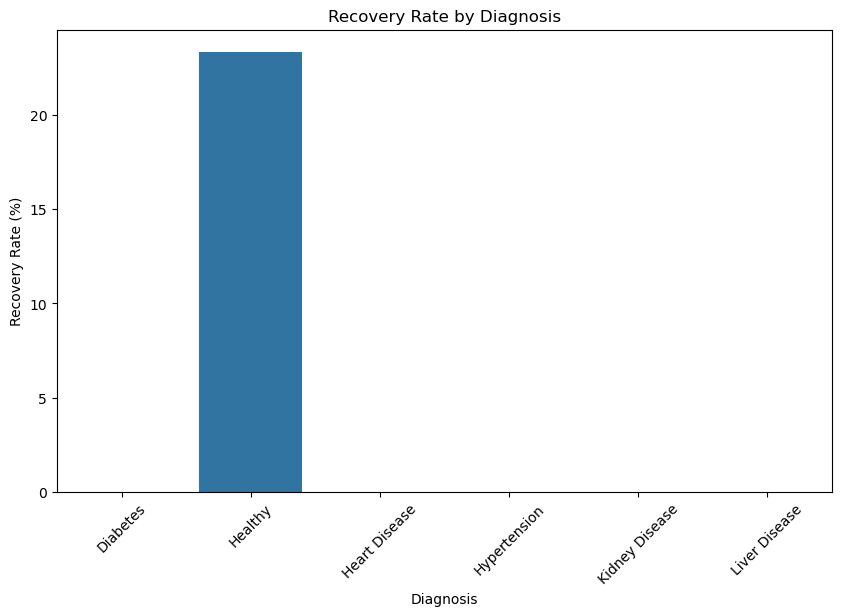

In [128]:
recovery_rate = df.groupby('diagnosis')['treatment_outcome'].value_counts(normalize=True).unstack().fillna(0)
recovery_rate['Recovery Rate'] = recovery_rate['recovered'] * 100

plt.figure(figsize=(10, 6))
sns.barplot(x=recovery_rate.index, y=recovery_rate['Recovery Rate'])
plt.title('Recovery Rate by Diagnosis')
plt.xlabel('Diagnosis')
plt.ylabel('Recovery Rate (%)')
plt.xticks(rotation=45)
plt.show()

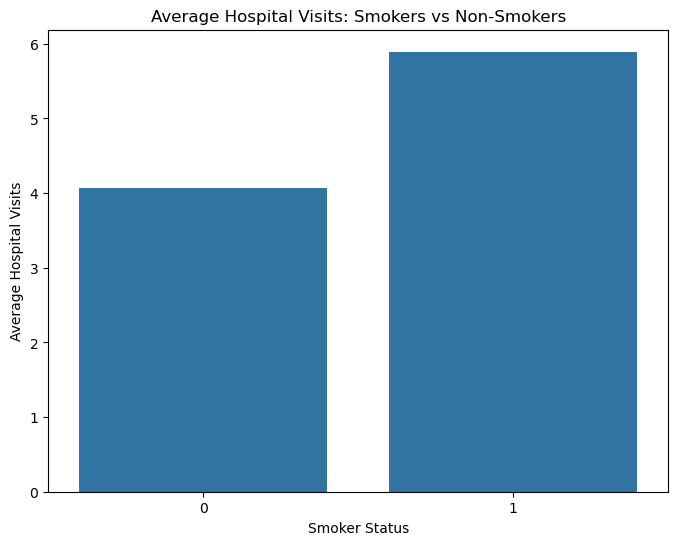

In [130]:
smoking_visits = df.groupby('smoker')['hospital_visits'].mean()

plt.figure(figsize=(8, 6))
sns.barplot(x=smoking_visits.index, y=smoking_visits)
plt.title('Average Hospital Visits: Smokers vs Non-Smokers')
plt.xlabel('Smoker Status')
plt.ylabel('Average Hospital Visits')
plt.show()

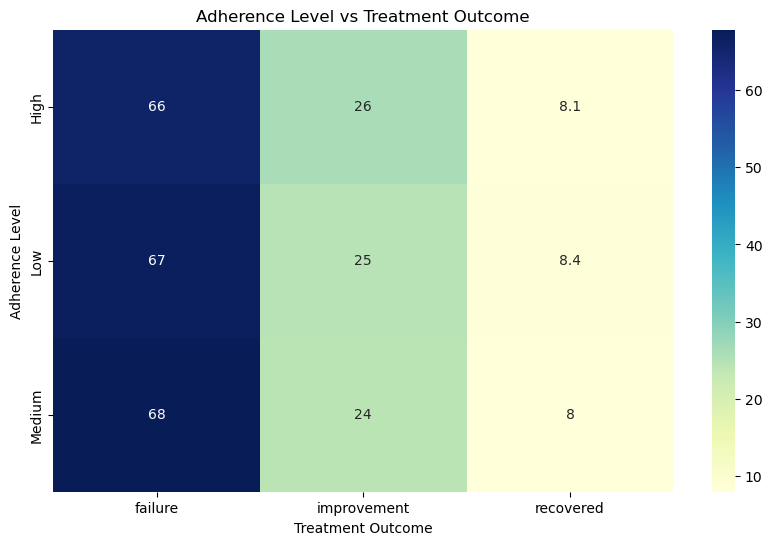

In [132]:
adherence_outcome = pd.crosstab(df['adherence_level'], df['treatment_outcome'], normalize='index') * 100

plt.figure(figsize=(10, 6))
sns.heatmap(adherence_outcome, annot=True, cmap="YlGnBu", cbar=True)
plt.title('Adherence Level vs Treatment Outcome')
plt.xlabel('Treatment Outcome')
plt.ylabel('Adherence Level')
plt.show()

## Encode categorical features

In [135]:
dct = dict()
for col in df.select_dtypes("object").columns:
    dct[col] = df[col].unique()

In [137]:
encoders = dict()
df_encoded = df.copy()
for col in df_encoded.select_dtypes("object").columns:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col])
    encoders[col] = le  

for col, le in encoders.items():
    print(f"Transformed values for {col}:")
    print(dct[col])
    print(le.transform(dct[col]))
    print("-------------------------")

Transformed values for gender:
['Female' 'Male']
[0 1]
-------------------------
Transformed values for alcohol_intake:
['Low' 'High' 'Moderate']
[1 0 2]
-------------------------
Transformed values for infection_risk:
['Low' 'High' 'Medium']
[1 0 2]
-------------------------
Transformed values for diagnosis:
['Liver Disease' 'Healthy' 'Kidney Disease' 'Heart Disease' 'Diabetes'
 'Hypertension']
[5 1 4 2 0 3]
-------------------------
Transformed values for treatment_outcome:
['failure' 'improvement' 'recovered']
[0 1 2]
-------------------------
Transformed values for adherence_level:
['Medium' 'Low' 'High']
[2 1 0]
-------------------------
Transformed values for medication:
['Statins' 'No Drug' 'Lisinopril' 'Metformin' 'Beta Blockers']
[4 3 1 2 0]
-------------------------


## Normalize numerical features

In [140]:
numeric_cols = df.select_dtypes(include='number').columns
scaler = StandardScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

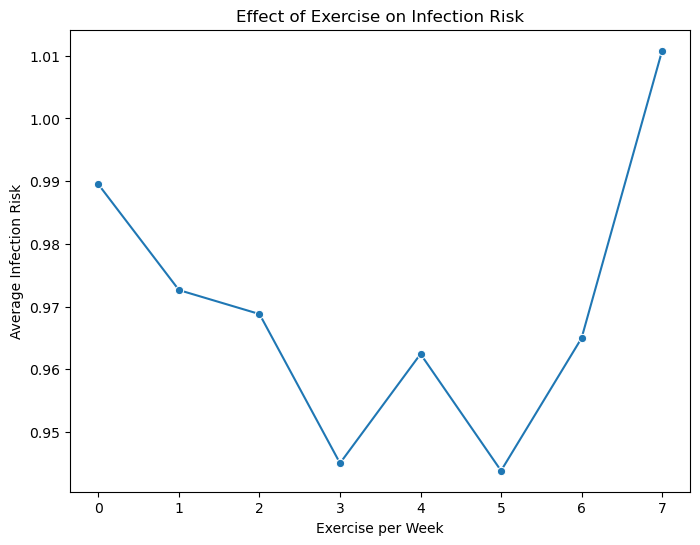

In [142]:
exercise_risk = df_encoded.groupby('exercise_per_week')['infection_risk'].mean()

plt.figure(figsize=(8, 6))
sns.lineplot(x=exercise_risk.index, y=exercise_risk.values, marker='o')
plt.title('Effect of Exercise on Infection Risk')
plt.xlabel('Exercise per Week')
plt.ylabel('Average Infection Risk')
plt.show()

## Prediction

In [145]:
# Split the data into features and target variable
x = df_encoded.drop(columns=['treatment_outcome','age_bin','bmi_bin'])
y = df_encoded['treatment_outcome']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y , train_size = 0.8 , random_state = 42 , stratify = y)

In [147]:
model = LogisticRegression()
model.fit(X_train, y_train)

C:\Users\User\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression()

In [149]:
y_pred = model.predict(X_test)

In [151]:
accuracy_score(y_test , y_pred) 

0.9298969072164949

In [153]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       648
           1       0.83      0.91      0.87       243
           2       0.87      0.61      0.72        79

    accuracy                           0.93       970
   macro avg       0.89      0.83      0.85       970
weighted avg       0.93      0.93      0.93       970



### DecisionTreeClassifier

In [156]:
# Train a Random Forest Classifier
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [158]:
# Making predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Calculate the accuracy
from sklearn.metrics import accuracy_score
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
print('The training accuracy is', train_accuracy)
print('The test accuracy is', test_accuracy)

The training accuracy is 1.0
The test accuracy is 0.9969072164948454


In [160]:
# TODO: Make predictions
model = DecisionTreeClassifier(max_depth=6, min_samples_leaf=6, min_samples_split=10)
model.fit(X_train, y_train)

# TODO: Calculate the accuracy
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Calculate the accuracy
from sklearn.metrics import accuracy_score
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
print('The training accuracy is', train_accuracy)
print('The test accuracy is', test_accuracy)

The training accuracy is 0.9997422680412371
The test accuracy is 0.9969072164948454
